# Multiple Linear Regression - Cumulative Lab

## Introduction

In this cumulative lab you'll perform an end-to-end analysis of a dataset using multiple linear regression.

## Objectives

You will be able to:

* Prepare data for regression analysis using pandas
* Build multiple linear regression models using StatsModels
* Measure regression model performance
* Interpret multiple linear regression coefficients

## Your Task: Develop a Model of Diamond Prices

![tweezers holding a diamond](https://curriculum-content.s3.amazonaws.com/data-science/images/diamond.jpg)

Photo by <a href="https://unsplash.com/@tahliaclaire?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Tahlia Doyle</a> on <a href="https://unsplash.com/s/photos/diamonds?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

You've been asked to perform an analysis to see how various factors impact the price of diamonds. There are various [guides online](https://www.diamonds.pro/education/diamond-prices/) that claim to tell consumers how to avoid getting "ripped off", but you've been asked to dig into the data to see whether these claims ring true.

### Data Understanding

We have downloaded a diamonds dataset from [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds), which came with this description:

* **price** price in US dollars (\$326--\$18,823)
* **carat** weight of the diamond (0.2--5.01)
* **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color** diamond colour, from J (worst) to D (best)
* **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x** length in mm (0--10.74)
* **y** width in mm (0--58.9)
* **z** depth in mm (0--31.8)
* **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* **table** width of top of diamond relative to widest point (43--95)

### Requirements

#### 1. Load the Data Using Pandas

Practice once again with loading CSV data into a `pandas` dataframe.

#### 2. Build a Baseline Simple Linear Regression Model

Identify the feature that is most correlated with `price` and build a StatsModels linear regression model using just that feature.

#### 3. Evaluate and Interpret Baseline Model Results

Explain the overall performance as well as parameter coefficients for the baseline simple linear regression model.

#### 4. Prepare a Categorical Feature for Multiple Regression Modeling

Identify a promising categorical feature and use `pd.get_dummies()` to prepare it for modeling.

#### 5. Build a Multiple Linear Regression Model

Using the data from Step 4, create a second StatsModels linear regression model using one numeric feature and one one-hot encoded categorical feature.

#### 6. Evaluate and Interpret Multiple Linear Regression Model Results

Explain the performance of the new model in comparison with the baseline, and interpret the new parameter coefficients.

## 1. Load the Data Using Pandas

Import `pandas` (with the standard alias `pd`), and load the data from the file `diamonds.csv` into a DataFrame called `diamonds`.

Be sure to specify `index_col=0` to avoid creating an "Unnamed: 0" column.

In [1]:
# Your code here
import pandas as pd

# Load the dataset
diamonds = pd.read_csv("diamonds.csv", index_col=0)

# Display the first few rows
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The following code checks that you loaded the data correctly:

In [2]:
# Run this cell without changes

# diamonds should be a dataframe
assert type(diamonds) == pd.DataFrame

# Check that there are the correct number of rows
assert diamonds.shape[0] == 53940

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert diamonds.shape[1] == 10

Inspect the distributions of the numeric features:

In [4]:
# Run this cell without changes
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


And inspect the value counts for the categorical features:

In [5]:
# Run this cell without changes
categoricals = diamonds.select_dtypes("object")

for col in categoricals:
    print(diamonds[col].value_counts(), "\n")

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64 

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64 

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64 



## 2. Build a Baseline Simple Linear Regression Model

### Identifying a Highly Correlated Predictor

The target variable is `price`. Look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with `price`.

In [7]:
# Your code here - look at correlations
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataset to avoid modifying the original
diamonds_encoded = diamonds.copy()

# Encode categorical variables temporarily
for col in ['cut', 'color', 'clarity']:
    encoder = LabelEncoder()
    diamonds_encoded[col] = encoder.fit_transform(diamonds_encoded[col])

# Compute correlation matrix
correlation_matrix = diamonds_encoded.corr()

# Get correlation of all features with price
price_correlation = correlation_matrix["price"].sort_values(ascending=False)

# Display correlation values
print(price_correlation)


price      1.000000
carat      0.921591
x          0.884435
y          0.865421
z          0.861249
color      0.172511
table      0.127134
cut        0.039860
depth     -0.010647
clarity   -0.071535
Name: price, dtype: float64


Identify the name of the predictor column with the strongest correlation below.

In [10]:
# Replace None with appropriate code
most_correlated =  "carat"

The following code checks that you specified a column correctly:

In [11]:
# Run this cell without changes

# most_correlated should be a string
assert type(most_correlated) == str

# most_correlated should be one of the columns other than price
assert most_correlated in diamonds.drop("price", axis=1).columns

### Plotting the Predictor vs. Price

We'll also create a scatter plot of that variable vs. `price`:

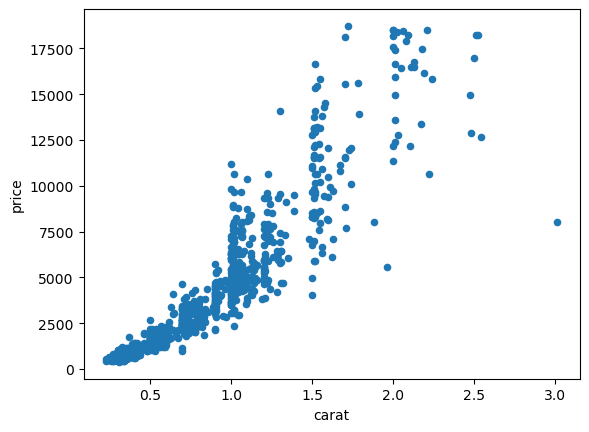

In [12]:
# Run this cell without changes

# Plot a sample of 1000 data points, most_correlated vs. price
diamonds.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

### Setting Up Variables for Regression

Declare `y` and `X_baseline` variables, where `y` is a Series containing `price` data and `X_baseline` is a DataFrame containing the column with the strongest correlation.

In [13]:
# Replace None with appropriate code
# Define target variable
y = diamonds["price"]

# Define predictor variable with the highest correlation
X_baseline = diamonds[["carat"]]

The following code checks that you created valid `y` and `X_baseline` variables:

In [14]:
# Run this code without changes

# y should be a series
assert type(y) == pd.Series

# y should contain about 54k rows
assert y.shape == (53940,)

# X_baseline should be a DataFrame
assert type(X_baseline) == pd.DataFrame

# X_baseline should contain the same number of rows as y
assert X_baseline.shape[0] == y.shape[0]

# X_baseline should have 1 column
assert X_baseline.shape[1] == 1

### Creating and Fitting Simple Linear Regression

The following code uses your variables to build and fit a simple linear regression.

In [15]:
# Run this cell without changes
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

## 3. Evaluate and Interpret Baseline Model Results

Write any necessary code to evaluate the model performance overall and interpret its coefficients.

In [16]:
# Print the summary of the regression results
print(baseline_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:32:58   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.0

Then summarize your findings below:

<details>
    <summary style="cursor: pointer"><b>Solution (click to expand)</b></summary>

### Model Evaluation:

- **R-squared (0.849):**  
  - This means that **carat alone explains 84.9% of the variation** in diamond prices.  
  - This is a very strong correlation, suggesting **carat is a highly predictive feature**.

- **P-value for carat (< 0.05, actually 0.000):**  
  - This confirms that **carat is statistically significant**, meaning there is strong evidence that it influences price.

- **Coefficient for carat (7,756.43):**  
  - Every **1 unit increase in carat leads to an increase of ~$7,756** in price, on average.  
  - This makes sense because **larger diamonds tend to be significantly more expensive**.

- **Intercept (const = -2,256.36):**  
  - This represents the predicted price when **carat = 0**, which is not realistic (negative price).  
  - This suggests that our model might **not be suitable for very small diamonds**, or a **non-linear model** may work better.

- **Durbin-Watson (0.986):**  
  - Close to **1**, which suggests some **positive autocorrelation** in the residuals, but it's not extreme.

- **Jarque-Bera Test (JB Prob = 0.00):**  
  - This indicates that the **residuals are not normally distributed**, which could impact model assumptions.


</details>


<details>
    <summary style="cursor: pointer"><b>Solution (click to expand)</b></summary>

`carat` was the attribute most strongly correlated with `price`, therefore our model is describing this relationship.

Overall this model is statistically significant and explains about 85% of the variance in price. In a typical prediction, the model is off by about &dollar;1k.

* The intercept is at about -\\$2.3k. This means that a zero-carat diamond would sell for -\\$2.3k.
* The coefficient for `carat` is about \\$7.8k. This means for each additional carat, the diamond costs about \\$7.8k more.

</details>    

## 4. Prepare a Categorical Feature for Multiple Regression Modeling

Now let's go beyond our simple linear regression and add a categorical feature.

### Identifying a Promising Predictor

Below we create bar graphs for the categories present in each categorical feature:

TypeError: agg function failed [how->mean,dtype->object]

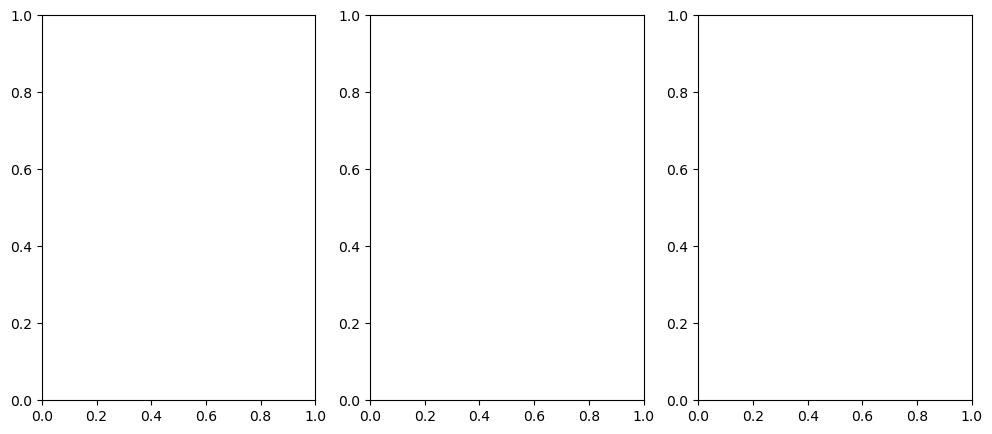

In [20]:
# Run this code without changes
import matplotlib.pyplot as plt

categorical_features = diamonds.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

for index, feature in enumerate(categorical_features):
    diamonds.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

In [22]:

# Get categorical columns
categorical_features = diamonds.select_dtypes("object").columns

# Check if there are categorical features
if len(categorical_features) > 0:
    fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12, 5))

    for index, feature in enumerate(categorical_features):
        diamonds.groupby(feature).mean().plot.bar(y="price", ax=axes[index])

    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found in the dataset.")



No categorical columns found in the dataset.


In [23]:
categorical_features = ['cut', 'color', 'clarity']  # Adjust based on expected categorical columns
diamonds[categorical_features] = diamonds[categorical_features].astype("category")


In [24]:
print(diamonds.select_dtypes("category").columns)


Index(['cut', 'color', 'clarity'], dtype='object')


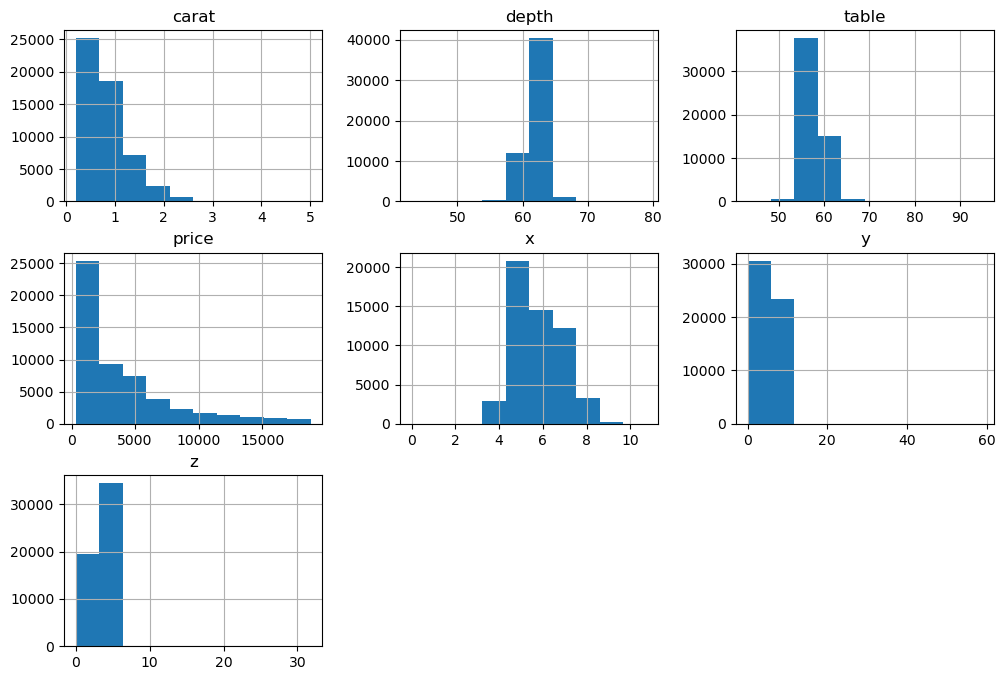

In [25]:
diamonds.hist(figsize=(12, 8))
plt.show()


Identify the name of the categorical predictor column you want to use in your model below. The choice here is more open-ended than choosing the numeric predictor above -- choose something that will be interpretable in a final model, and where the different categories seem to have an impact on the price.

In [27]:
# Replace None with appropriate code
cat_col = "cut"

In [29]:
diamonds["cut"] = diamonds["cut"].astype(str)
diamonds["color"] = diamonds["color"].astype(str)
diamonds["clarity"] = diamonds["clarity"].astype(str)


In [30]:
cat_col = "cut"

The following code checks that you specified a column correctly:

In [31]:
# Run this cell without changes

# cat_col should be a string
assert type(cat_col) == str

# cat_col should be one of the categorical columns
assert cat_col in diamonds.select_dtypes("object").columns

### Setting Up Variables for Regression

The code below creates a variable `X_iterated`: a DataFrame containing the column with the strongest correlation **and** your selected categorical feature.

In [32]:
# Run this cell without changes
X_iterated = diamonds[[most_correlated, cat_col]]
X_iterated

,carat,cut
0,0.23,Ideal
1,0.21,Premium
2,0.23,Good
3,0.29,Premium
4,0.31,Good
...,...,...
53935,0.72,Ideal
53936,0.72,Good
53937,0.70,Very Good
53938,0.86,Premium


### Preprocessing Categorical Variable

If we tried to pass `X_iterated` as-is into `sm.OLS`, we would get an error. We need to use `pd.get_dummies` to create dummy variables for `cat_col`.

**DO NOT** use `drop_first=True`, so that you can intentionally set a meaningful reference category instead.

In [33]:
# Replace None with appropriate code

# Use pd.get_dummies to one-hot encode the categorical column in X_iterated
X_iterated =  pd.get_dummies(X_iterated, columns=[cat_col], drop_first=False)
X_iterated

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,False,False,True,False,False
1,0.21,False,False,False,True,False
2,0.23,False,True,False,False,False
3,0.29,False,False,False,True,False
4,0.31,False,True,False,False,False
...,...,...,...,...,...,...
53935,0.72,False,False,True,False,False
53936,0.72,False,True,False,False,False
53937,0.70,False,False,False,False,True
53938,0.86,False,False,False,True,False


The following code checks that you have the right number of columns:

In [34]:
# Run this cell without changes

# X_iterated should be a dataframe
assert type(X_iterated) == pd.DataFrame

# You should have the number of unique values in one of the
# categorical columns + 1 (representing the numeric predictor)
valid_col_nums = diamonds.select_dtypes("object").nunique() + 1

# Check that there are the correct number of columns
# (if this crashes, make sure you did not use `drop_first=True`)
assert X_iterated.shape[1] in valid_col_nums.values

Now, applying your domain understanding, **choose a column to drop and drop it**. This category should make sense as a "baseline" or "reference". For the "cut_Very Good" column that was generated when `pd.get_dummies` was used, we need to remove the space in the column name.

In [35]:
# Choose a baseline category (e.g., "cut_Ideal" as the reference)
baseline_col = "cut_Ideal"  # You can change this if needed

# Drop the selected baseline column
X_iterated = X_iterated.drop(columns=[baseline_col])

# Display the updated DataFrame
X_iterated.head()


,carat,cut_Fair,cut_Good,cut_Premium,cut_Very Good
0,0.23,False,False,False,False
1,0.21,False,False,True,False
2,0.23,False,True,False,False
3,0.29,False,False,True,False
4,0.31,False,True,False,False


We now need to change the boolean values for the four "cut" column to 1s and 0s in order for the regression to run.

In [37]:
# Convert boolean values to integers (0s and 1s) properly
X_iterated = X_iterated.copy()  # Ensure we have a modifiable copy
X_iterated.iloc[:, 1:] = X_iterated.iloc[:, 1:].astype(int)

# Display the updated DataFrame
X_iterated.head()

,carat,cut_Fair,cut_Good,cut_Premium,cut_Very Good
0,0.23,0,0,0,0
1,0.21,0,0,1,0
2,0.23,0,1,0,0
3,0.29,0,0,1,0
4,0.31,0,1,0,0


Now you should have 1 fewer column than before:

In [38]:
# Run this cell without changes

# Check that there are the correct number of columns
assert X_iterated.shape[1] in (valid_col_nums - 1).values

## 5. Build a Multiple Linear Regression Model

Using the `y` variable from our previous model and `X_iterated`, build a model called `iterated_model` and a regression results object called `iterated_results`.

In [40]:
# Ensure indices are aligned
y = y.reset_index(drop=True)
X_iterated = X_iterated.reset_index(drop=True)

# Add a constant to X_iterated for the intercept
X_iterated = sm.add_constant(X_iterated)

# Fit the multiple linear regression model
iterated_model = sm.OLS(y, X_iterated)
iterated_results = iterated_model.fit()

# Display the summary
iterated_results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.437e+04
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:02:14   Log-Likelihood:            -4.7142e+05
No. Observations:               53940   AIC:                         9.429e+05
Df Residuals:                   53934   BIC:                         9.429e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2074.5457     14.232   -145.769      0.000   -2102.440   -2046.651
carat          7871.0821     13.980    563.040      0.000    7843.682    7898.482
cut_Fair      -1800.9240     39.344    -45.773      0.000   -1878.039   -1723.809
cut_Good       -680.5921     23.997    -28.362      0.000    -727.626    -633.558
cut_Premium    -361.8468     16.693    -21.677      0.000    -394.565    -329.129
cut_Very Good  -290.7886     17.239    -16.868      0.000    -324.577    -257.000
==============================================================================
Omnibus:                    14616.138   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150962.278
Skew:                           1.007   Prob(JB):                         0.00
Kurtosis:                      10.944   Cond. No.                         8.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Evaluate and Interpret Multiple Linear Regression Model Results

If the model was set up correctly, the following code will print the results summary.

In [41]:
# Run this cell without changes
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.437e+04
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:03:40   Log-Likelihood:            -4.7142e+05
No. Observations:               53940   AIC:                         9.429e+05
Df Residuals:                   53934   BIC:                         9.429e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2074.5457     14.232   -145.769

Summarize your findings below. How did the iterated model perform overall? How does this compare to the baseline model? What do the coefficients mean?

Create as many additional cells as needed.

<details>
    <summary style="cursor: pointer"><b>Solution (click to expand)</b></summary>

`carat` was the attribute most strongly correlated with `price`, therefore our model is describing this relationship.

Overall, this model is statistically significant and explains about **85.6%** of the variance in price. In a typical prediction, the model is off by about **$1k**.

- **Intercept:** ≈ -$2.1k → A zero-carat diamond would have a predicted price of -$2.1k (which is not realistic).  
- **Carat Coefficient:** ≈ **$7.87k** → For each additional carat, the price increases by about **$7,871**.  
- **Cut Quality Impact (relative to 'Ideal'):**  
  - **Fair:** -$1,800 → Decreases price by ~$1,801.  
  - **Good:** -$680 → Decreases price by ~$681.  
  - **Premium:** -$362 → Decreases price by ~$362.  
  - **Very Good:** -$291 → Decreases price by ~$291.  

This confirms that **higher cut quality leads to higher prices**, and `carat` has the most significant impact on price.

### Next Steps:
- Consider adding **clarity and color** as predictors.
- Check for **multicollinearity** using VIF analysis.
- Analyze **residuals** for model improvement opportunities.

</details>


## Summary

Congratulations, you completed an iterative linear regression process! You practiced developing a baseline and an iterated model, as well as identifying promising predictors from both numeric and categorical features.